Exploratory data analysis (EDA) is a crucial component of data science which allows one to understand the basics of what your data looks like and what kinds of questions might be answered by them. For this task, we are going to clean, sanitize and explore our data. Using the movies dataset, answer the following questions by writing code in the cells.


In [2]:
# Importing the required packages here

import numpy as np
import pandas as pd
import seaborn as sns
import ast, json

from datetime import datetime
import matplotlib.pyplot as plt
%matplotlib inline


In [3]:
#### load the movie and credit and create their dataframes

movies_df = pd.read_csv('movies.csv', delimiter=',')

In [4]:
movies_df.head()

,budget,genres,homepage,id,keywords,original_language,original_title,overview,popularity,production_companies,production_countries,release_date,revenue,runtime,spoken_languages,status,tagline,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.avatarmovie.com/,19995,"[{""id"": 1463, ""name"": ""culture clash""}, {""id"":...",en,Avatar,"In the 22nd century, a paraplegic Marine is di...",150.437577,"[{""name"": ""Ingenious Film Partners"", ""id"": 289...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Enter the World of Pandora.,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",http://disney.go.com/disneypictures/pirates/,285,"[{""id"": 270, ""name"": ""ocean""}, {""id"": 726, ""na...",en,Pirates of the Caribbean: At World's End,"Captain Barbossa, long believed to be dead, ha...",139.082615,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"At the end of the world, the adventure begins.",Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://www.sonypictures.com/movies/spectre/,206647,"[{""id"": 470, ""name"": ""spy""}, {""id"": 818, ""name...",en,Spectre,A cryptic message from Bond’s past sends him o...,107.376788,"[{""name"": ""Columbia Pictures"", ""id"": 5}, {""nam...","[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,A Plan No One Escapes,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",http://www.thedarkknightrises.com/,49026,"[{""id"": 849, ""name"": ""dc comics""}, {""id"": 853,...",en,The Dark Knight Rises,Following the death of District Attorney Harve...,112.312950,"[{""name"": ""Legendary Pictures"", ""id"": 923}, {""...","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Legend Ends,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",http://movies.disney.com/john-carter,49529,"[{""id"": 818, ""name"": ""based on novel""}, {""id"":...",en,John Carter,"John Carter is a war-weary, former military ca...",43.926995,"[{""name"": ""Walt Disney Pictures"", ""id"": 2}]","[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,"Lost in our world, found in another.",John Carter,6.1,2124


### Data Cleansing 
#### Clean the data. Identify columns that are redundant or unnecessary.

It is always easier to make your decisions based on data which is relevant and concise. Remove the following columns ['keywords', 'homepage', 'status', 'tagline', 'original_language', 'homepage', 'overview', 'production_companies', 'original_title', 'title_y'] from the data set as they will not be used in the analysis.

In [5]:
droped_movies = movies_df.drop(['homepage', 'keywords', 'tagline', 'original_language', 'overview', 'production_companies', 'original_title'], axis=1)
droped_movies.head(15)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,115.699814,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman: Dawn of Justice,5.7,7004


#### Remove any duplicate rows

In [6]:
length1 = len(droped_movies)
cleaned_data = droped_movies.drop_duplicates(subset='title')
length2 = len(cleaned_data)
print(length1, length2)

4803 4800


#### Some movies in the database have zero budget or zero revenue which implies that their values have not been recorded or some information is missing. Discard such entries from the dataframe.

In [7]:
cleaned2 = cleaned_data[cleaned_data['budget'] > 0]

cleaned3 = cleaned2[cleaned2['revenue'] > 0]
cleaned3
cleaned3.head(10)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124
5,258000000,"[{""id"": 14, ""name"": ""Fantasy""}, {""id"": 28, ""na...",559,115.699814,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-01,890871626,139.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Spider-Man 3,5.9,3576
6,260000000,"[{""id"": 16, ""name"": ""Animation""}, {""id"": 10751...",38757,48.681969,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2010-11-24,591794936,100.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Tangled,7.4,3330
7,280000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",99861,134.279229,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2015-04-22,1405403694,141.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Avengers: Age of Ultron,7.3,6767
8,250000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",767,98.885637,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2009-07-07,933959197,153.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Harry Potter and the Half-Blood Prince,7.4,5293
9,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",209112,155.790452,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2016-03-23,873260194,151.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Batman v Superman: Dawn of Justice,5.7,7004


#### To manipulate the columns easily, it is important that we make use of the python objects. Change the release date column into Date format and extract the year from the date. This will help us in analysing yearly data.

In [8]:
# Change the release_date column to DateTime column
clean_data = cleaned3
clean_data
clean_data['release_date'] = pd.to_datetime(clean_data['release_date'], format='%Y-%m-%d')
clean_data['release_date'].astype('datetime64[ns]')
clean_data['release_date']
# Extract the release year from every release date
release_year = clean_data['year'] = clean_data['release_date'].dt.year
release_year

C:\Users\Matth\anaconda3\lib\site-packages\ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.
C:\Users\Matth\anaconda3\lib\site-packages\ipykernel_launcher.py:8: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


0       2009
1       2007
2       2015
3       2012
4       2012
        ... 
4773    1994
4788    1972
4792    1997
4796    2004
4798    1992
Name: release_date, Length: 3228, dtype: int64

#### Change budget and revenue columns format to integer using numpy’s int64 method.

In [9]:
clean_data['budget'].astype(np.int64)
clean_data['revenue'].astype(np.int64)
clean_data

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year
0,237000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",19995,150.437577,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2009-12-10,2787965087,162.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}, {""iso...",Released,Avatar,7.2,11800,2009
1,300000000,"[{""id"": 12, ""name"": ""Adventure""}, {""id"": 14, ""...",285,139.082615,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2007-05-19,961000000,169.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",206647,107.376788,"[{""iso_3166_1"": ""GB"", ""name"": ""United Kingdom""...",2015-10-26,880674609,148.0,"[{""iso_639_1"": ""fr"", ""name"": ""Fran\u00e7ais""},...",Released,Spectre,6.3,4466,2015
3,250000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 80, ""nam...",49026,112.312950,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-07-16,1084939099,165.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,The Dark Knight Rises,7.6,9106,2012
4,260000000,"[{""id"": 28, ""name"": ""Action""}, {""id"": 12, ""nam...",49529,43.926995,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2012-03-07,284139100,132.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4773,27000,"[{""id"": 35, ""name"": ""Comedy""}]",2292,19.748658,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1994-09-13,3151130,92.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Clerks,7.4,755,1994
4788,12000,"[{""id"": 27, ""name"": ""Horror""}, {""id"": 35, ""nam...",692,4.553644,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",1972-03-12,6000000,93.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Pink Flamingos,6.2,110,1972
4792,20000,"[{""id"": 80, ""name"": ""Crime""}, {""id"": 27, ""name...",36095,0.212443,"[{""iso_3166_1"": ""JP"", ""name"": ""Japan""}]",1997-11-06,99000,111.0,"[{""iso_639_1"": ""ja"", ""name"": ""\u65e5\u672c\u8a...",Released,Cure,7.4,63,1997
4796,7000,"[{""id"": 878, ""name"": ""Science Fiction""}, {""id""...",14337,23.307949,"[{""iso_3166_1"": ""US"", ""name"": ""United States o...",2004-10-08,424760,77.0,"[{""iso_639_1"": ""en"", ""name"": ""English""}]",Released,Primer,6.9,658,2004


On checking the dataset, we see that genres, keywords, production_companies, production_countries, spoken_languages are in the JSON format which will make it difficult to manipulate the dataframe. Now let’s flatten these columns into a format that can be easily interpreted.

I will help you convert them into strings and later convert them into lists. Writing a generic function to parse JSON columns.

In [10]:
def parse_col_json(column, key):
    """
    Args:
        column: string
            name of the column to be processed.
        key: string
            name of the dictionary key which needs to be extracted
    """
    for index,i in zip(clean_data.index,clean_data[column].apply(json.loads)):
        list1=[]
        for j in range(len(i)):
            list1.append((i[j][key]))# the key 'name' contains the name of the genre
        clean_data.loc[index,column]=str(list1)
    
parse_col_json('genres', 'name')
parse_col_json('spoken_languages', 'name')
#parse_col_json('cast', 'name')
parse_col_json('production_countries', 'name')

clean_data.head()

C:\Users\Matth\anaconda3\lib\site-packages\pandas\core\indexing.py:965: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  self.obj[item] = s


,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Released,Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],Released,The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],Released,John Carter,6.1,2124,2012


In [11]:
clean_data.reset_index(drop=True)

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Released,Avatar,7.2,11800,2009
1,300000000,"['Adventure', 'Fantasy', 'Action']",285,139.082615,['United States of America'],2007-05-19,961000000,169.0,['English'],Released,Pirates of the Caribbean: At World's End,6.9,4500,2007
2,245000000,"['Action', 'Adventure', 'Crime']",206647,107.376788,"['United Kingdom', 'United States of America']",2015-10-26,880674609,148.0,"['Français', 'English', 'Español', 'Italiano',...",Released,Spectre,6.3,4466,2015
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],Released,The Dark Knight Rises,7.6,9106,2012
4,260000000,"['Action', 'Adventure', 'Science Fiction']",49529,43.926995,['United States of America'],2012-03-07,284139100,132.0,['English'],Released,John Carter,6.1,2124,2012
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3223,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Released,Clerks,7.4,755,1994
3224,12000,"['Horror', 'Comedy', 'Crime']",692,4.553644,['United States of America'],1972-03-12,6000000,93.0,['English'],Released,Pink Flamingos,6.2,110,1972
3225,20000,"['Crime', 'Horror', 'Mystery', 'Thriller']",36095,0.212443,['Japan'],1997-11-06,99000,111.0,['日本語'],Released,Cure,7.4,63,1997
3226,7000,"['Science Fiction', 'Drama', 'Thriller']",14337,23.307949,['United States of America'],2004-10-08,424760,77.0,['English'],Released,Primer,6.9,658,2004


### Now onto the exploration

#### Identify relationships between variables / features

The main goal here is to identify and create relationships which can help you to build ideas. I have defined questions which can help you identify some relationships to explore.

#### Which are the 5 most expensive movies? How do the most expensive and cheapest movies compare? Exploring the most expensive movies help you explore if some movies are worth the money spent on them based on their performance and revenue generated.

In [12]:
most_expensive_movies = clean_data.nlargest(5, ['budget'])
most_expensive_movies
least_expensive_movies = clean_data.nsmallest(5, ['budget'])
least_expensive_movies

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year
4238,1,"['Drama', 'Comedy']",3082,28.276480,['United States of America'],1936-02-05,8500000,87.0,['English'],Released,Modern Times,8.1,856,1936
3611,4,"['Drama', 'Romance', 'War']",22649,1.199451,['United States of America'],1932-12-08,25,89.0,['English'],Released,A Farewell to Arms,6.2,28,1932
3372,7,"['Thriller', 'Action', 'Horror', 'Science Fict...",13006,4.857028,['United Kingdom'],1992-05-01,5,90.0,['English'],Released,Split Second,5.7,63,1992
3419,7,"['Comedy', 'Drama', 'Foreign', 'Romance']",38415,0.050456,[],2009-08-09,7,82.0,[],Released,Bran Nue Dae,5.2,6,2009
4608,8,"['Fantasy', 'Horror', 'Thriller']",11980,11.818333,['United States of America'],1995-09-01,16,98.0,['English'],Released,The Prophecy,6.4,138,1995


#### What are the top 5 most profitable movies? Compare the min and max profits. The comparison helps us indentify the different approaches which failed and succeeded. Subtracting the budget from the revenue generated, will return the profit earned.

In [13]:
most_profitable_movies = clean_data.nlargest(5, ['revenue'])
most_profitable_movies

min_profit = clean_data.nsmallest(1, ['revenue'])
max_profit = clean_data.nlargest(1, ['revenue'])
min_profit
max_profit

profit_earned_max = max_profit['revenue'] - max_profit['budget']
profit_earned_max

profit_earned_min = min_profit['revenue'] - min_profit['budget']
profit_earned_min

3372   -2
dtype: int64

#### Find the most talked about movies. Sort the dataframe based on the popularity column.

#### Find Movies which are rated above 7



In [14]:
sorted_by_pop = clean_data.sort_values('vote_average', ascending=False)
sorted_by_pop

movies_above_7 = clean_data.loc[clean_data['vote_average'] > 7]
movies_above_7

,budget,genres,id,popularity,production_countries,release_date,revenue,runtime,spoken_languages,status,title,vote_average,vote_count,year
0,237000000,"['Action', 'Adventure', 'Fantasy', 'Science Fi...",19995,150.437577,"['United States of America', 'United Kingdom']",2009-12-10,2787965087,162.0,"['English', 'Español']",Released,Avatar,7.2,11800,2009
3,250000000,"['Action', 'Crime', 'Drama', 'Thriller']",49026,112.312950,['United States of America'],2012-07-16,1084939099,165.0,['English'],Released,The Dark Knight Rises,7.6,9106,2012
6,260000000,"['Animation', 'Family']",38757,48.681969,['United States of America'],2010-11-24,591794936,100.0,['English'],Released,Tangled,7.4,3330,2010
7,280000000,"['Action', 'Adventure', 'Science Fiction']",99861,134.279229,['United States of America'],2015-04-22,1405403694,141.0,['English'],Released,Avengers: Age of Ultron,7.3,6767,2015
8,250000000,"['Adventure', 'Fantasy', 'Family']",767,98.885637,"['United Kingdom', 'United States of America']",2009-07-07,933959197,153.0,['English'],Released,Harry Potter and the Half-Blood Prince,7.4,5293,2009
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4713,160000,"['Documentary', 'History']",1779,3.284903,['United States of America'],1989-09-01,6706368,91.0,['English'],Released,Roger & Me,7.4,90,1989
4724,10000,"['Drama', 'Fantasy', 'Horror', 'Science Fiction']",985,20.399578,['United States of America'],1977-03-19,7000000,89.0,['English'],Released,Eraserhead,7.5,485,1977
4738,60000,"['Mystery', 'Drama', 'Thriller']",473,27.788067,['United States of America'],1998-07-10,3221152,84.0,['English'],Released,Pi,7.1,586,1998
4773,27000,['Comedy'],2292,19.748658,['United States of America'],1994-09-13,3151130,92.0,['English'],Released,Clerks,7.4,755,1994


#### Which year did we have the most profitable movies?
This will help to raise some deeper questions about the years when movies didn’t do well. These are preliminary questions which give rise to questions providing deeper insights.

In [239]:
clean_data.groupby(['year'])['revenue'].agg('sum').max()

24047236072

#### Most successful genres — create a bar plot explaining the frequency of movies in each genre.

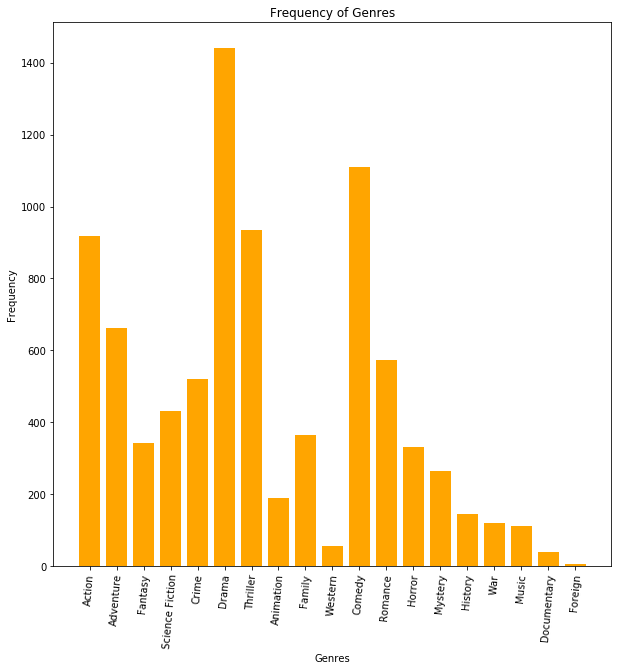

In [238]:
genres_list = clean_data['genres'].astype(str)
genres_list = ''.join(clean_data['genres'])

genres_list1 = genres_list.replace("[", "")
genres_list2 = genres_list1.replace("]", "")
genres_list3 = genres_list2.replace("''","','")
genres_list4 = genres_list3.replace("'","")
abc= genres_list4.split(",")
abc

output = []
for x in abc:
    if x.strip() not in output:
        output.append(x.strip())

x = []
y = []
for i in output:
    x.append(i)
    y.append(genres_list3.count(i))

plt.figure(figsize=(10,10))
plt.xlabel("Genres"); plt.ylabel("Frequency"); plt.title("Frequency of Genres");
plt.bar(x,y, color="orange");
plt.xticks(rotation = 85,fontsize = 10);

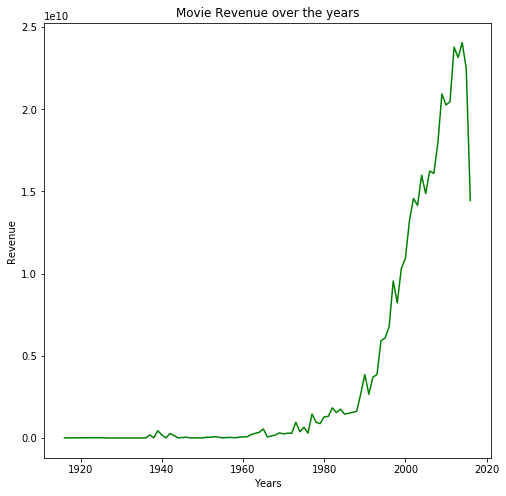

In [170]:
#### Generate three different interesting visualizations with a data story.

clean_data.groupby(['year'])['revenue'].agg('sum').plot(kind='line', figsize=(8,8), color='green');
plt.title('Movie Revenue over the years')
plt.ylabel('Revenue')
plt.xlabel('Years');

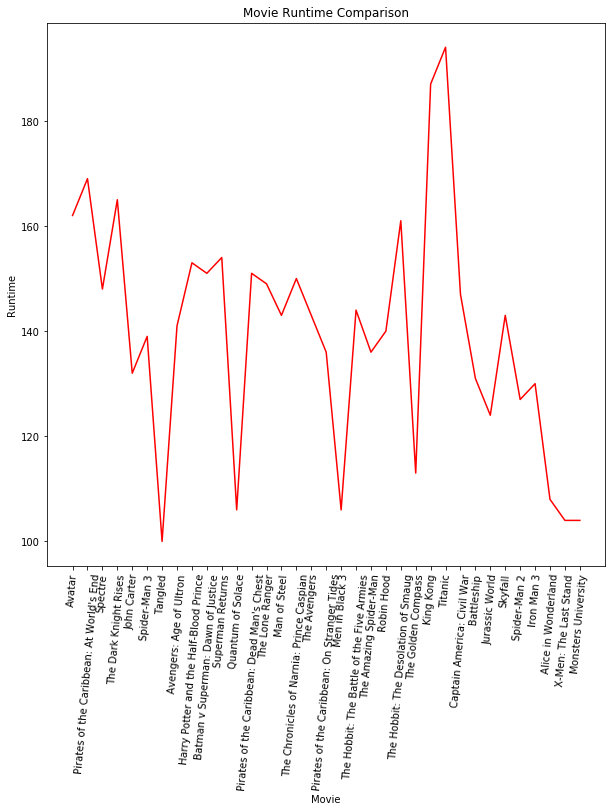

In [227]:
x = clean_data['title'].head(35)
y = clean_data['runtime'].head(35)
plt.figure(figsize=(10,10))
plt.xlabel("Movie"); plt.ylabel("Runtime"); plt.title("Movie Runtime Comparison");
plt.plot(x,y, color="red");
plt.xticks(rotation = 85,fontsize = 10);

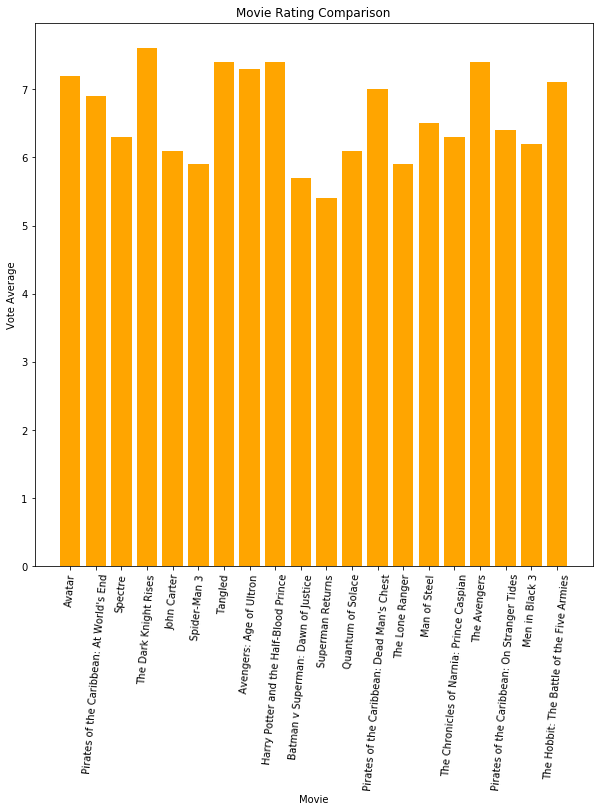

In [119]:
x = clean_data['title'].head(20)
y = clean_data['vote_average'].head(20)
plt.figure(figsize=(10,10))
plt.xlabel("Movie"); plt.ylabel("Vote Average"); plt.title("Movie Rating Comparison");
plt.bar(x,y, color="orange");
plt.xticks(rotation = 85,fontsize = 10);

# Now that you know how to Explore a Dataset, it's time for you to do it from start to end. Please find the Automobile Dataset in your task folder. 

### You are expected to create a report ('eda.docx' provides a template for what this report should look like) in which you explain your visualizations, investigations and findings. The Code for the Analysis should be in a jupyter notebook named automobile.ipynb.

## Be creative :)